In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
strokedf=df.copy()

In [4]:
strokedf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## The dataset used in this project contains medical records of patients and their associated risk factors for stroke

# features:

Id: Unique identification number for each patient.

Age: The age of the patient.

Hypertension: Whether the patient has hypertension (1 for yes, 0 for no).

Heart Disease: Whether the patient has a history of heart disease (1 for yes, 0 for no).

Ever Married: Whether the patient has been married (1 for yes, 0 for no).

Work Type: The type of work the patient does (e.g., private, self-employed, government, children).

Residence Type: Whether the patient resides in an urban or rural area.

Glucose Level: The patient's glucose level.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Smoking Status: The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).

Stroke: The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).

In [5]:
strokedf.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
strokedf.shape

(5110, 12)

In [7]:
strokedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
strokedf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Insights

Insights:Target Variable (stroke):

The mean value is 0.0487, indicating that only about 4.87% of the patients in the dataset had a stroke. This shows class imbalance, which might require handling during model :)

#Most patients do not have heart disease , hypertension

# Average Glucose Level in Blood

Mean: 106.15 around the normal range for fasting glucose levels

Std: 45.28 (high variability, with potential outliers).

Min: 55.12  normal range

Max: 271.74  very high, likely diabetic levels

Patients with high glucose levels may correlate with stroke risk, which should be explored further


#Outliers in BMI values might need to be handled +201 MISSING VALUES

In [9]:
strokedf.drop(columns=['id'],axis=1,inplace=True) 
strokedf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
# Remove rows where gender is 'Other'
strokedf = strokedf[strokedf['gender'] != 'Other']

strokedf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Gender analysis

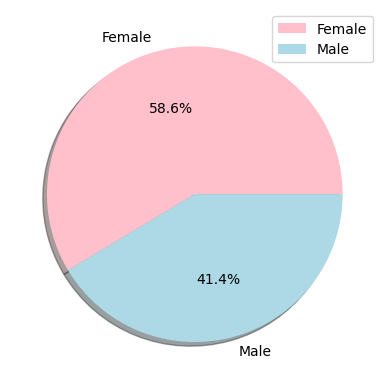

In [11]:
plt.pie(strokedf['gender'].value_counts(),labels=['Female','Male'],colors=['pink','lightblue'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

# Gender vs Smoking

<Axes: xlabel='gender', ylabel='count'>

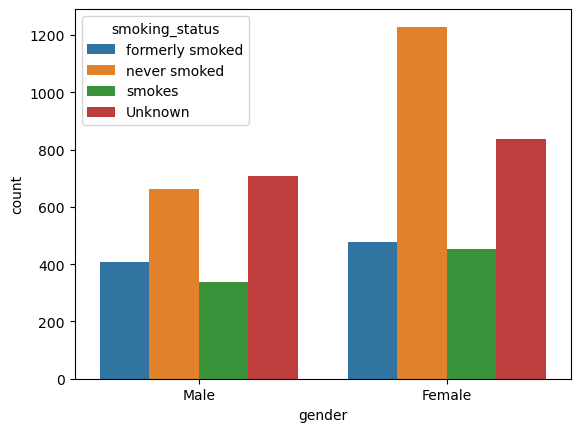

In [12]:
#Some visualization
sns.countplot(data=strokedf,x='gender',hue='smoking_status')


mostly woman is less trends towards smoking



# Heart disaese vs gender

<Axes: xlabel='heart_disease', ylabel='count'>

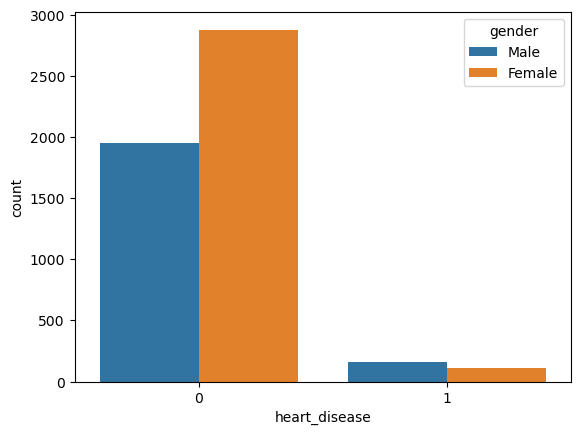

In [13]:
sns.countplot(data=strokedf,x='heart_disease',hue='gender')


Woman has less heart disease



not that imbananced but women are more in our data set

# Age Analysis

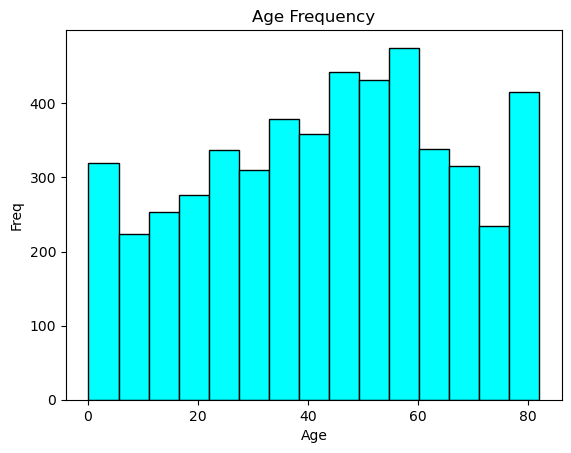

In [14]:
plt.hist(strokedf['age'],bins=15,color='cyan',edgecolor='black',linewidth=1)
plt.title('Age Frequency')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

# Hypertension Analysis


In [15]:
hyperTension_count=strokedf['hypertension'].value_counts()
hyperTension_percent=strokedf['hypertension'].value_counts(normalize=True)*100
freq_table2=pd.DataFrame({'Count':hyperTension_count,'Percentage %':hyperTension_percent})
freq_table2

,Count,Percentage %
hypertension,,
0,4611,90.252496
1,498,9.747504


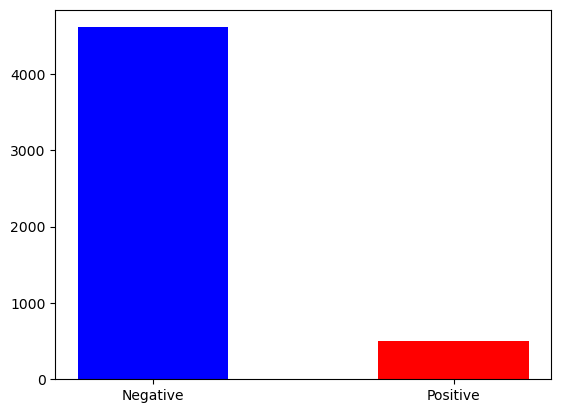

In [16]:
plt.bar(['Negative','Positive'],strokedf['hypertension'].value_counts(),align='center',width=0.5,color=['blue','red'])
plt.show()

Most of the people don't have Hyper Tension


# Heart Disease Analysis

In [17]:
heartDisease_count=strokedf['heart_disease'].value_counts()
heartDisease_percent=strokedf['heart_disease'].value_counts(normalize=True)*100
freq_table6=pd.DataFrame({'Count':heartDisease_count,'Percantage %':heartDisease_percent})
freq_table6

,Count,Percantage %
heart_disease,,
0,4833,94.597769
1,276,5.402231


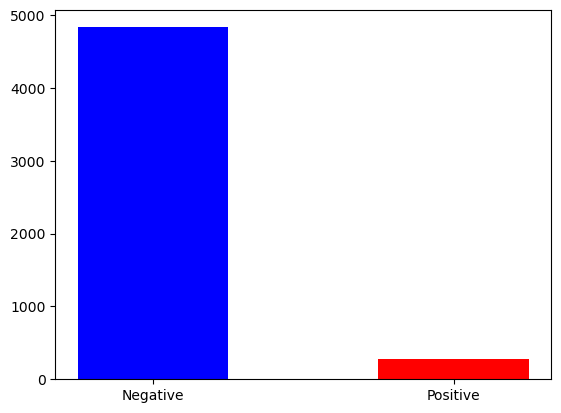

In [18]:
plt.bar(['Negative','Positive'],strokedf['heart_disease'].value_counts(),align='center',width=0.5,color=['blue','red'])
plt.show()

Most of the people don't suffer from Heart Disease


# Marriage Analysis

In [19]:
married_count=strokedf['ever_married'].value_counts()
married_percent=strokedf['ever_married'].value_counts(normalize=True)*100
freq_table3=pd.DataFrame({'Count':married_count,'Percentage %':married_percent})
freq_table3

,Count,Percentage %
ever_married,,
Yes,3353,65.629282
No,1756,34.370718


<Axes: xlabel='ever_married', ylabel='count'>

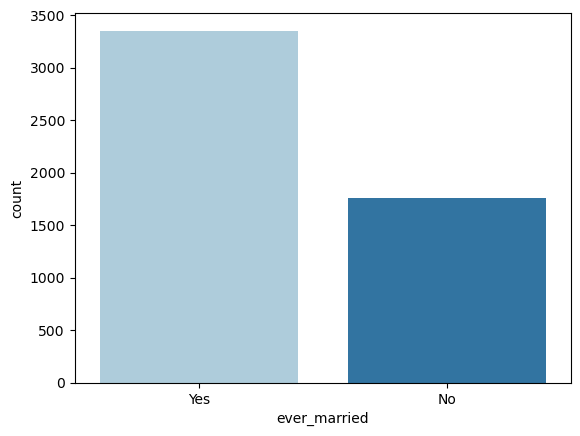

In [20]:
sns.countplot(x='ever_married',palette=sns.color_palette("Paired"),data=strokedf)

Most people are/ was married


# Work Type Analysis


In [21]:
job_count=strokedf['work_type'].value_counts()
job_percent=strokedf['work_type'].value_counts(normalize=True)*100
freq_table4=pd.DataFrame({'Count':job_count,'Percentage %':job_percent})
freq_table4

,Count,Percentage %
work_type,,
Private,2924,57.232335
Self-employed,819,16.030534
children,687,13.446858
Govt_job,657,12.859659
Never_worked,22,0.430613


<Axes: xlabel='work_type', ylabel='count'>

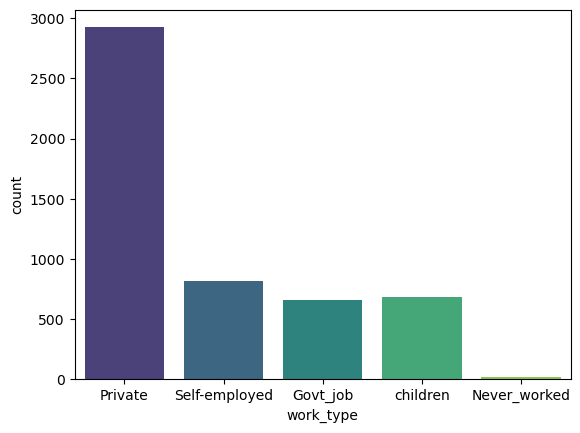

In [22]:
sns.countplot(x='work_type',palette='viridis',data=strokedf)

# Residence Type Analysis

In [23]:
Residence_type_count=strokedf['Residence_type'].value_counts()
Residence_type_percent=strokedf['Residence_type'].value_counts(normalize=True)*100
freq_table5=pd.DataFrame({'Count':Residence_type_count,'Percentage %':Residence_type_percent})
freq_table5

,Count,Percentage %
Residence_type,,
Urban,2596,50.812292
Rural,2513,49.187708


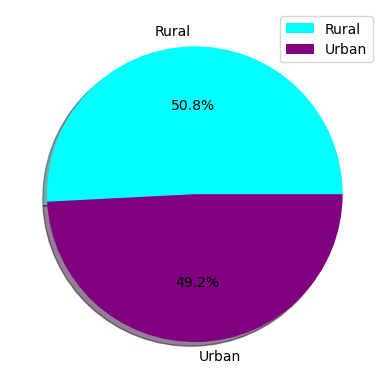

In [24]:
plt.pie(strokedf['Residence_type'].value_counts(),labels=['Rural','Urban'],colors=['cyan','purple'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

almost equal

# Average Glucose Level Analysis


In [25]:
strokedf['avg_glucose_level'].describe()


count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

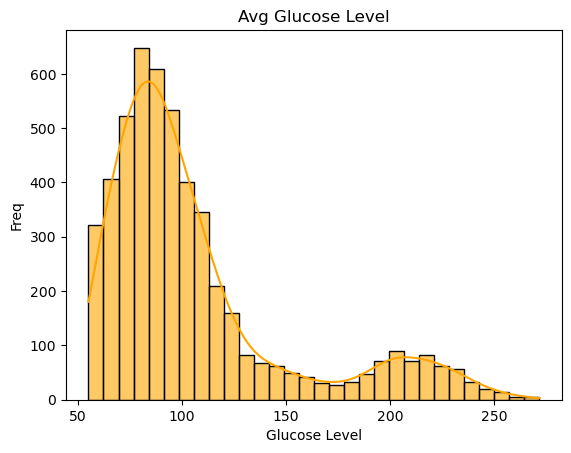

In [26]:
sns.histplot(strokedf['avg_glucose_level'],bins=30,kde=True,color='orange',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('Avg Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Freq')
plt.show()

# BMI analysis

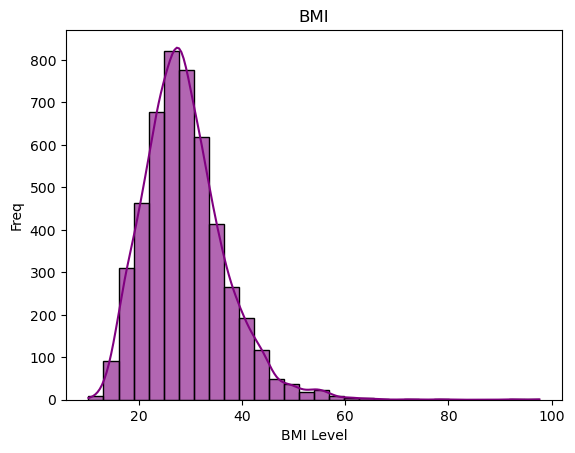

In [27]:
sns.histplot(strokedf['bmi'],bins=30,kde=True,color='purple',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('BMI')
plt.xlabel('BMI Level')
plt.ylabel('Freq')
plt.show()

Underweight: BMI less than 18.5

Normal weight: BMI 18.5 to 24.9

Overweight: BMI 25 to 29.9

Obesity: BMI 30 or higher

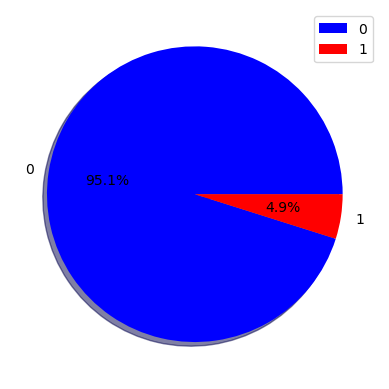

In [28]:
plt.pie(strokedf['stroke'].value_counts(),labels=['0','1'],colors=['blue','red'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

Most of the people don't suffer a stroke.

# Bivariate Analysis

Text(0.5, 1.0, 'Age vs Stroke')

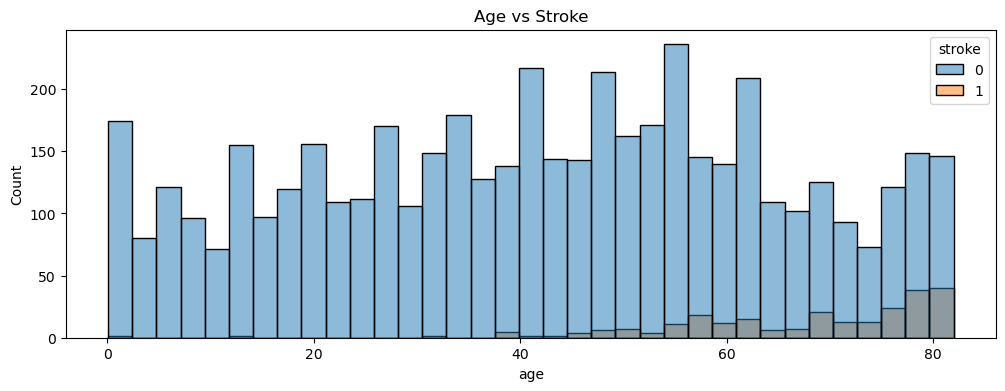

In [29]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=strokedf, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

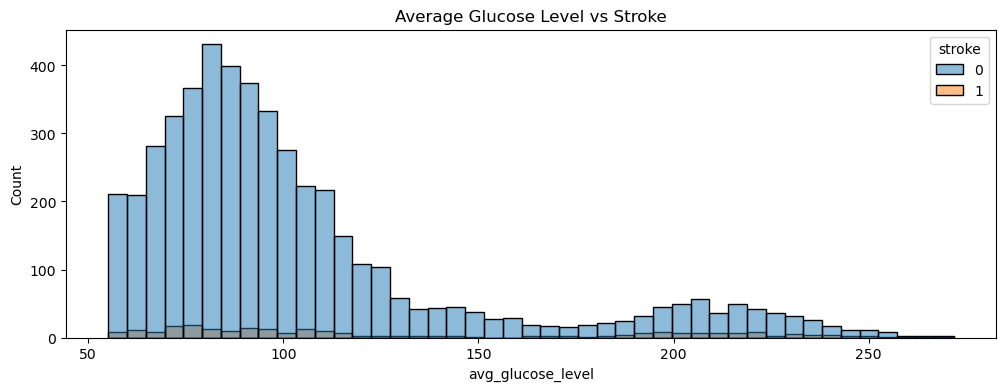

In [30]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=strokedf, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')

Text(0.5, 1.0, 'Stroke vs BMI')

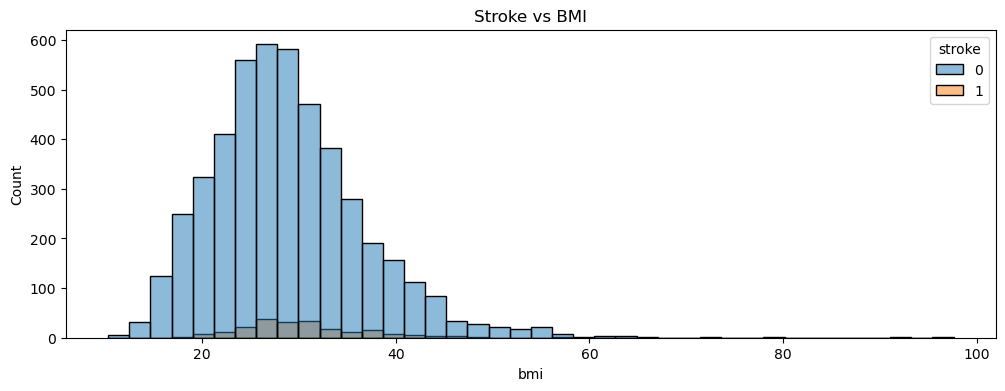

In [31]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=strokedf, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')

Insights:

#Age vs Stroke:

  Stroke incidents "gray" increase  after age 40

  The highest concentration of stroke cases appears in the 60-80 age range

  Very few stroke cases are reported in patients under 40

  The overall distribution shows age is a significant risk factor for strokes


#Average Glucose Level vs Stroke:
    The data suggests elevated glucose levels may increase stroke risk


#BMI vs Stroke:

 The majority of the population has BMI between 20-40

 Stroke cases  appear more frequently in the overweight and obese ranges (BMI > 25)
 
 The data suggests being overweight or obese may increase stroke risk

 though the relationship appears less significant than with age or glucose levels

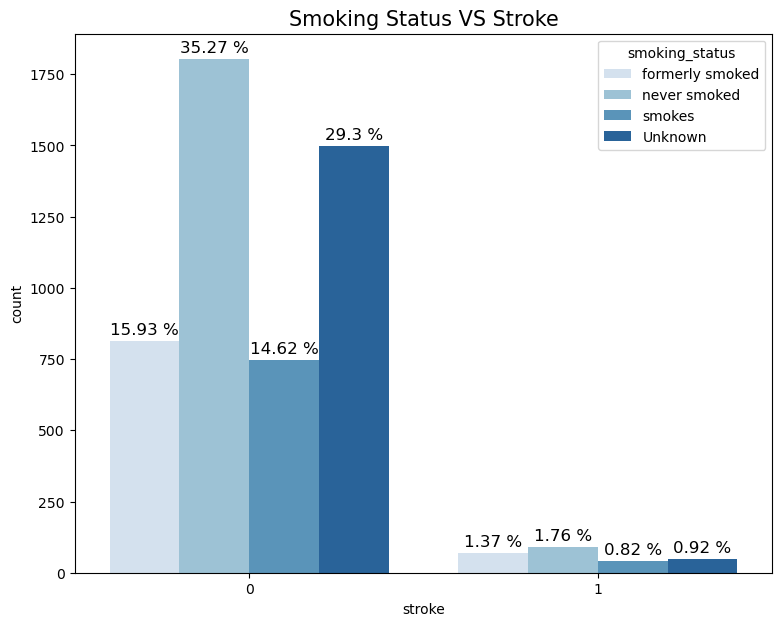

In [32]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=strokedf['stroke'],hue=strokedf['smoking_status'],palette = 'Blues',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(strokedf)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

The highest majority of "non-stroke" cases are among people who never smoked (35.27%)

but "Surprise" current smokers have a slightly lower "stroke rate" (0.82%) compared to those who never smoked (1.76%) or 

formerly smoked (1.37%) 

for me I think "this could be influenced by other factors like age distribution or sample size limitations" not logic

# Encodeing data

In [33]:
print("Unique values for 'work_type':", strokedf['work_type'].unique())
print("Unique values for 'gender':", strokedf['gender'].unique())
print("Unique values for 'Residence_type':", strokedf['Residence_type'].unique())
print("Unique values for 'ever_married':", strokedf['ever_married'].unique())
print("Unique values for 'smoking_status':", strokedf['smoking_status'].unique())


Unique values for 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for 'gender': ['Male' 'Female']
Unique values for 'Residence_type': ['Urban' 'Rural']
Unique values for 'ever_married': ['Yes' 'No']
Unique values for 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Label Encoding: for columns that have 2 values as we don't want to increasr the dimension of the data  'ever_married' 'residence_type' 'gender'


In [34]:
le = LabelEncoder()
strokedf['ever_married'] = le.fit_transform(strokedf['ever_married'])
strokedf['residence_type'] = le.fit_transform(strokedf['Residence_type'])
strokedf['gender'] = le.fit_transform(strokedf['gender'])

 OneHotEncode to encode the rest categorical columns: work_type ,smoking_status

 because it creates separate binary columns for each category (without implying any ranking or order). avoid any inadvanced problems with algorithms

In [35]:
strokedf = pd.get_dummies(strokedf, columns=['work_type'], drop_first=True)


In [36]:
strokedf = pd.get_dummies(strokedf, columns=['smoking_status'], drop_first=True)

In [37]:
strokedf.drop(columns=['Residence_type'], inplace=True)
bool_columns = strokedf.select_dtypes(include='bool').columns
strokedf[bool_columns] = strokedf[bool_columns].astype(int)

# Feature Engineering

In [38]:
strokedf['age_group'] = pd.cut(strokedf['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
strokedf['bmi_category'] = strokedf['bmi'].apply(lambda x: 'Underweight' if x < 18.5 else 'Normal weight' if x < 25 else 'Overweight' if x < 30 else 'Obesity')



In [39]:
#to use correlation matrix:
strokedf['age_group'] = strokedf['age_group'].astype('category').cat.codes
strokedf['bmi_category'] = strokedf['bmi_category'].apply(lambda x: {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obesity': 3}[x])

# Feature Selection

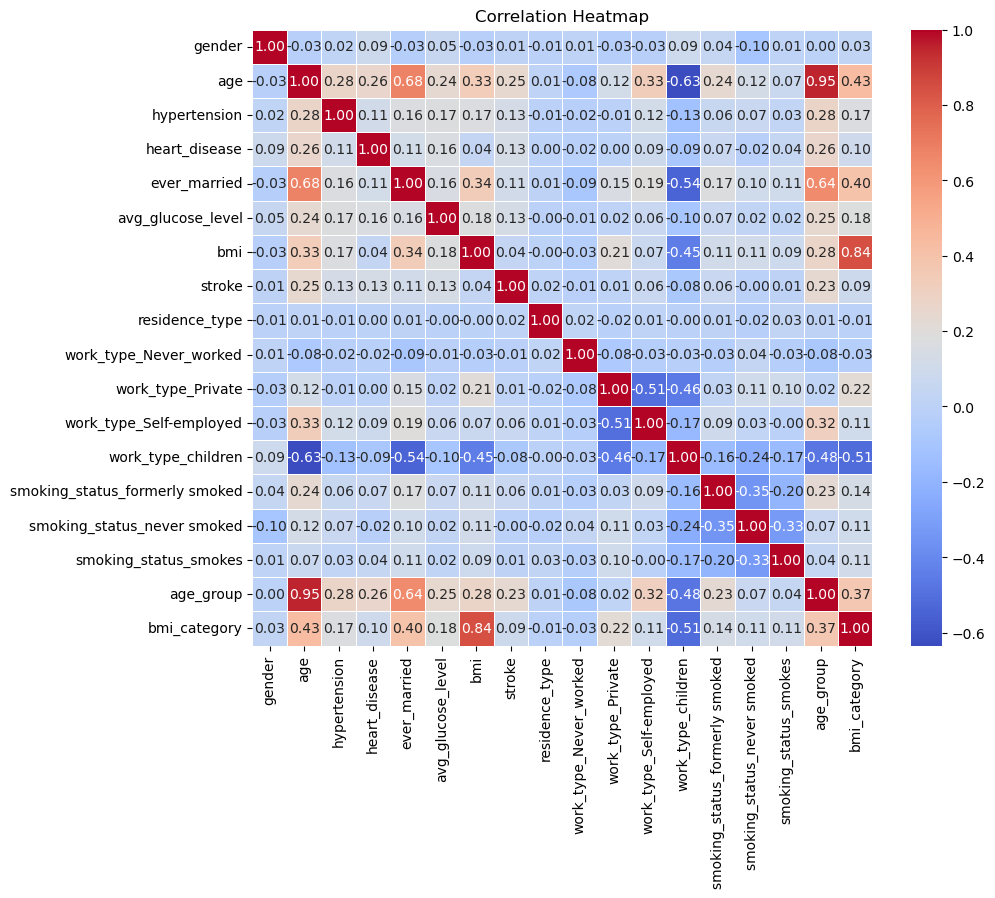

In [40]:
correlation_matrix = strokedf.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')

# Adding title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


Insights:

Stroke Correlations:

Stroke has weak positive correlations with most features

Age has the strongest correlation with stroke (0.25)



#features with Stronger Correlation with the Target (stroke):

age

hypertension

heart_disease

avg_glucose_level

bmi

#These features may add some value to the model but aren't as strong:

ever_married

smoking_status_formerly smoked

work_type (consider One-Hot Encoding for categorical values while excluding work_type_children).

#Features to Drop:

gender: Minimal correlation with stroke.
residence_type: No significant impact.

work_type_children: Avoid due to high negative correlation with age. "Multicollinearity"

smoking_status_never smoked and smoking_status_smokes: Very weak correlation.


In [41]:
strokedf.drop(columns=['age_group'], inplace=True) #not good idea
strokedf.drop(columns=['bmi_category'], inplace=True) #not good idea

after normalizarion to make agood feature we will think of create  "Health Risk Score" feature

# Scatter plot for all feature in data even encoded 

<Figure size 1500x1000 with 0 Axes>

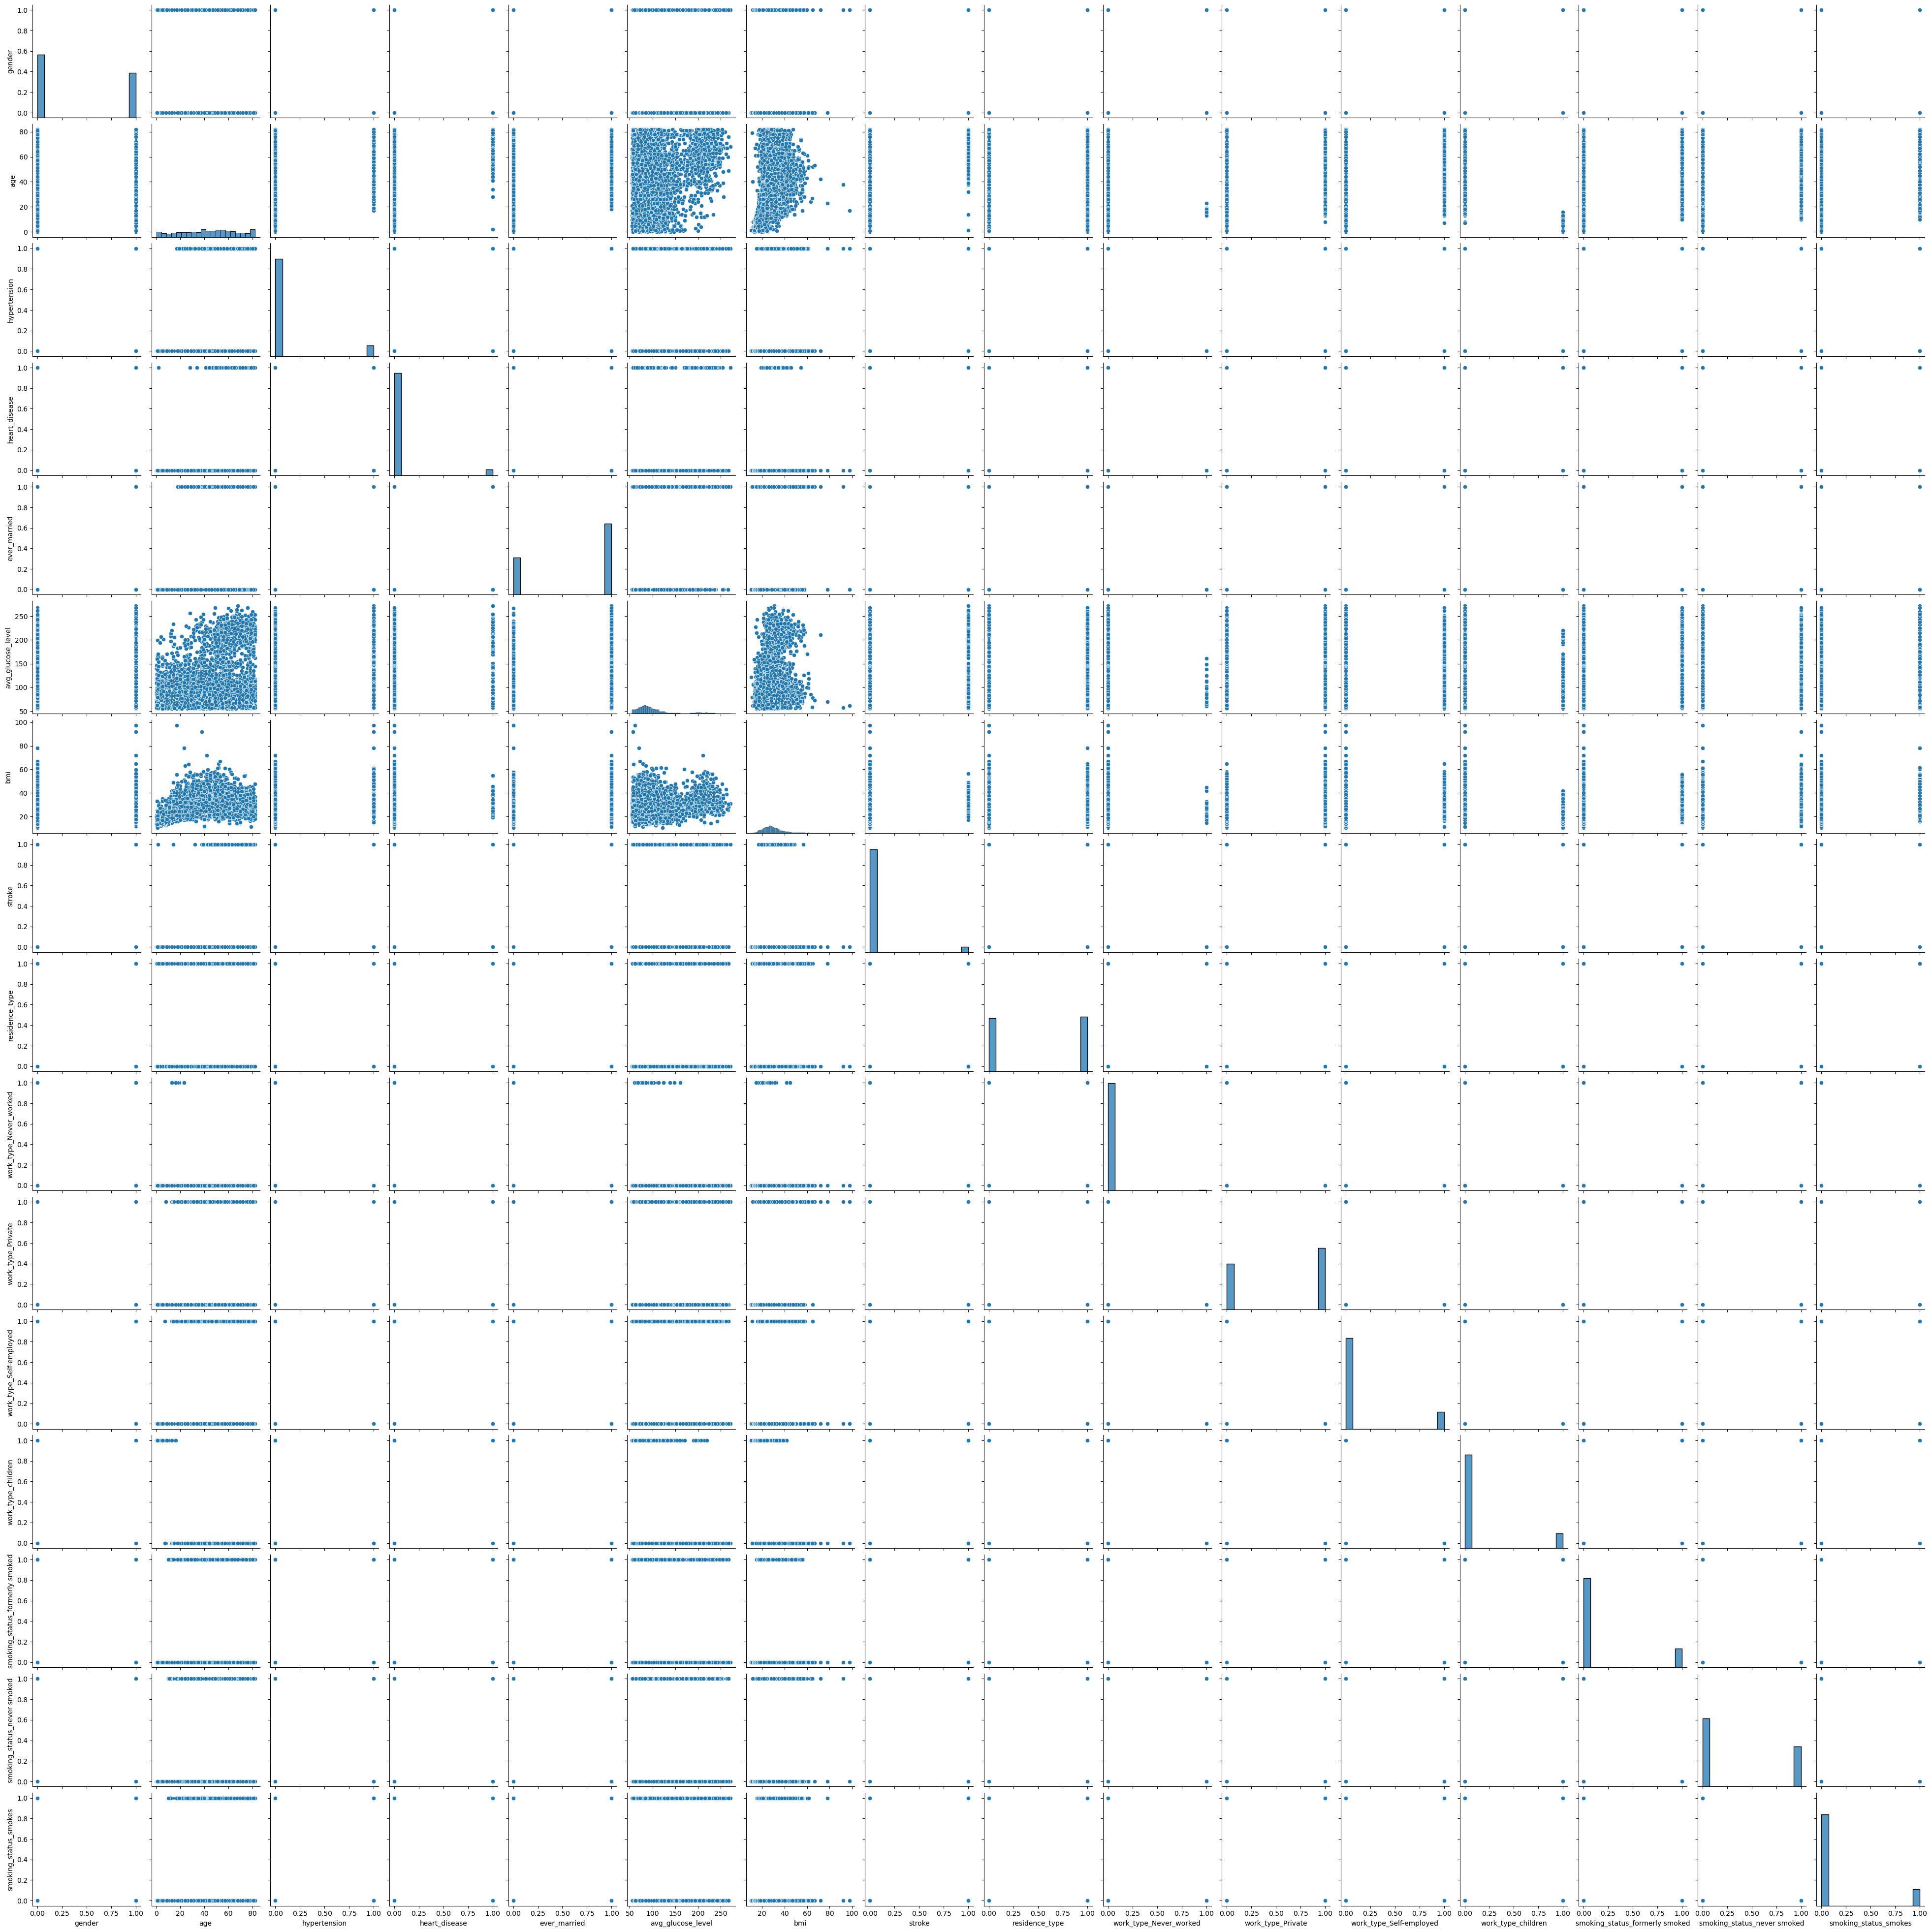

In [42]:
plt.figure(figsize=(15, 10))
sns.pairplot(strokedf)
plt.show()

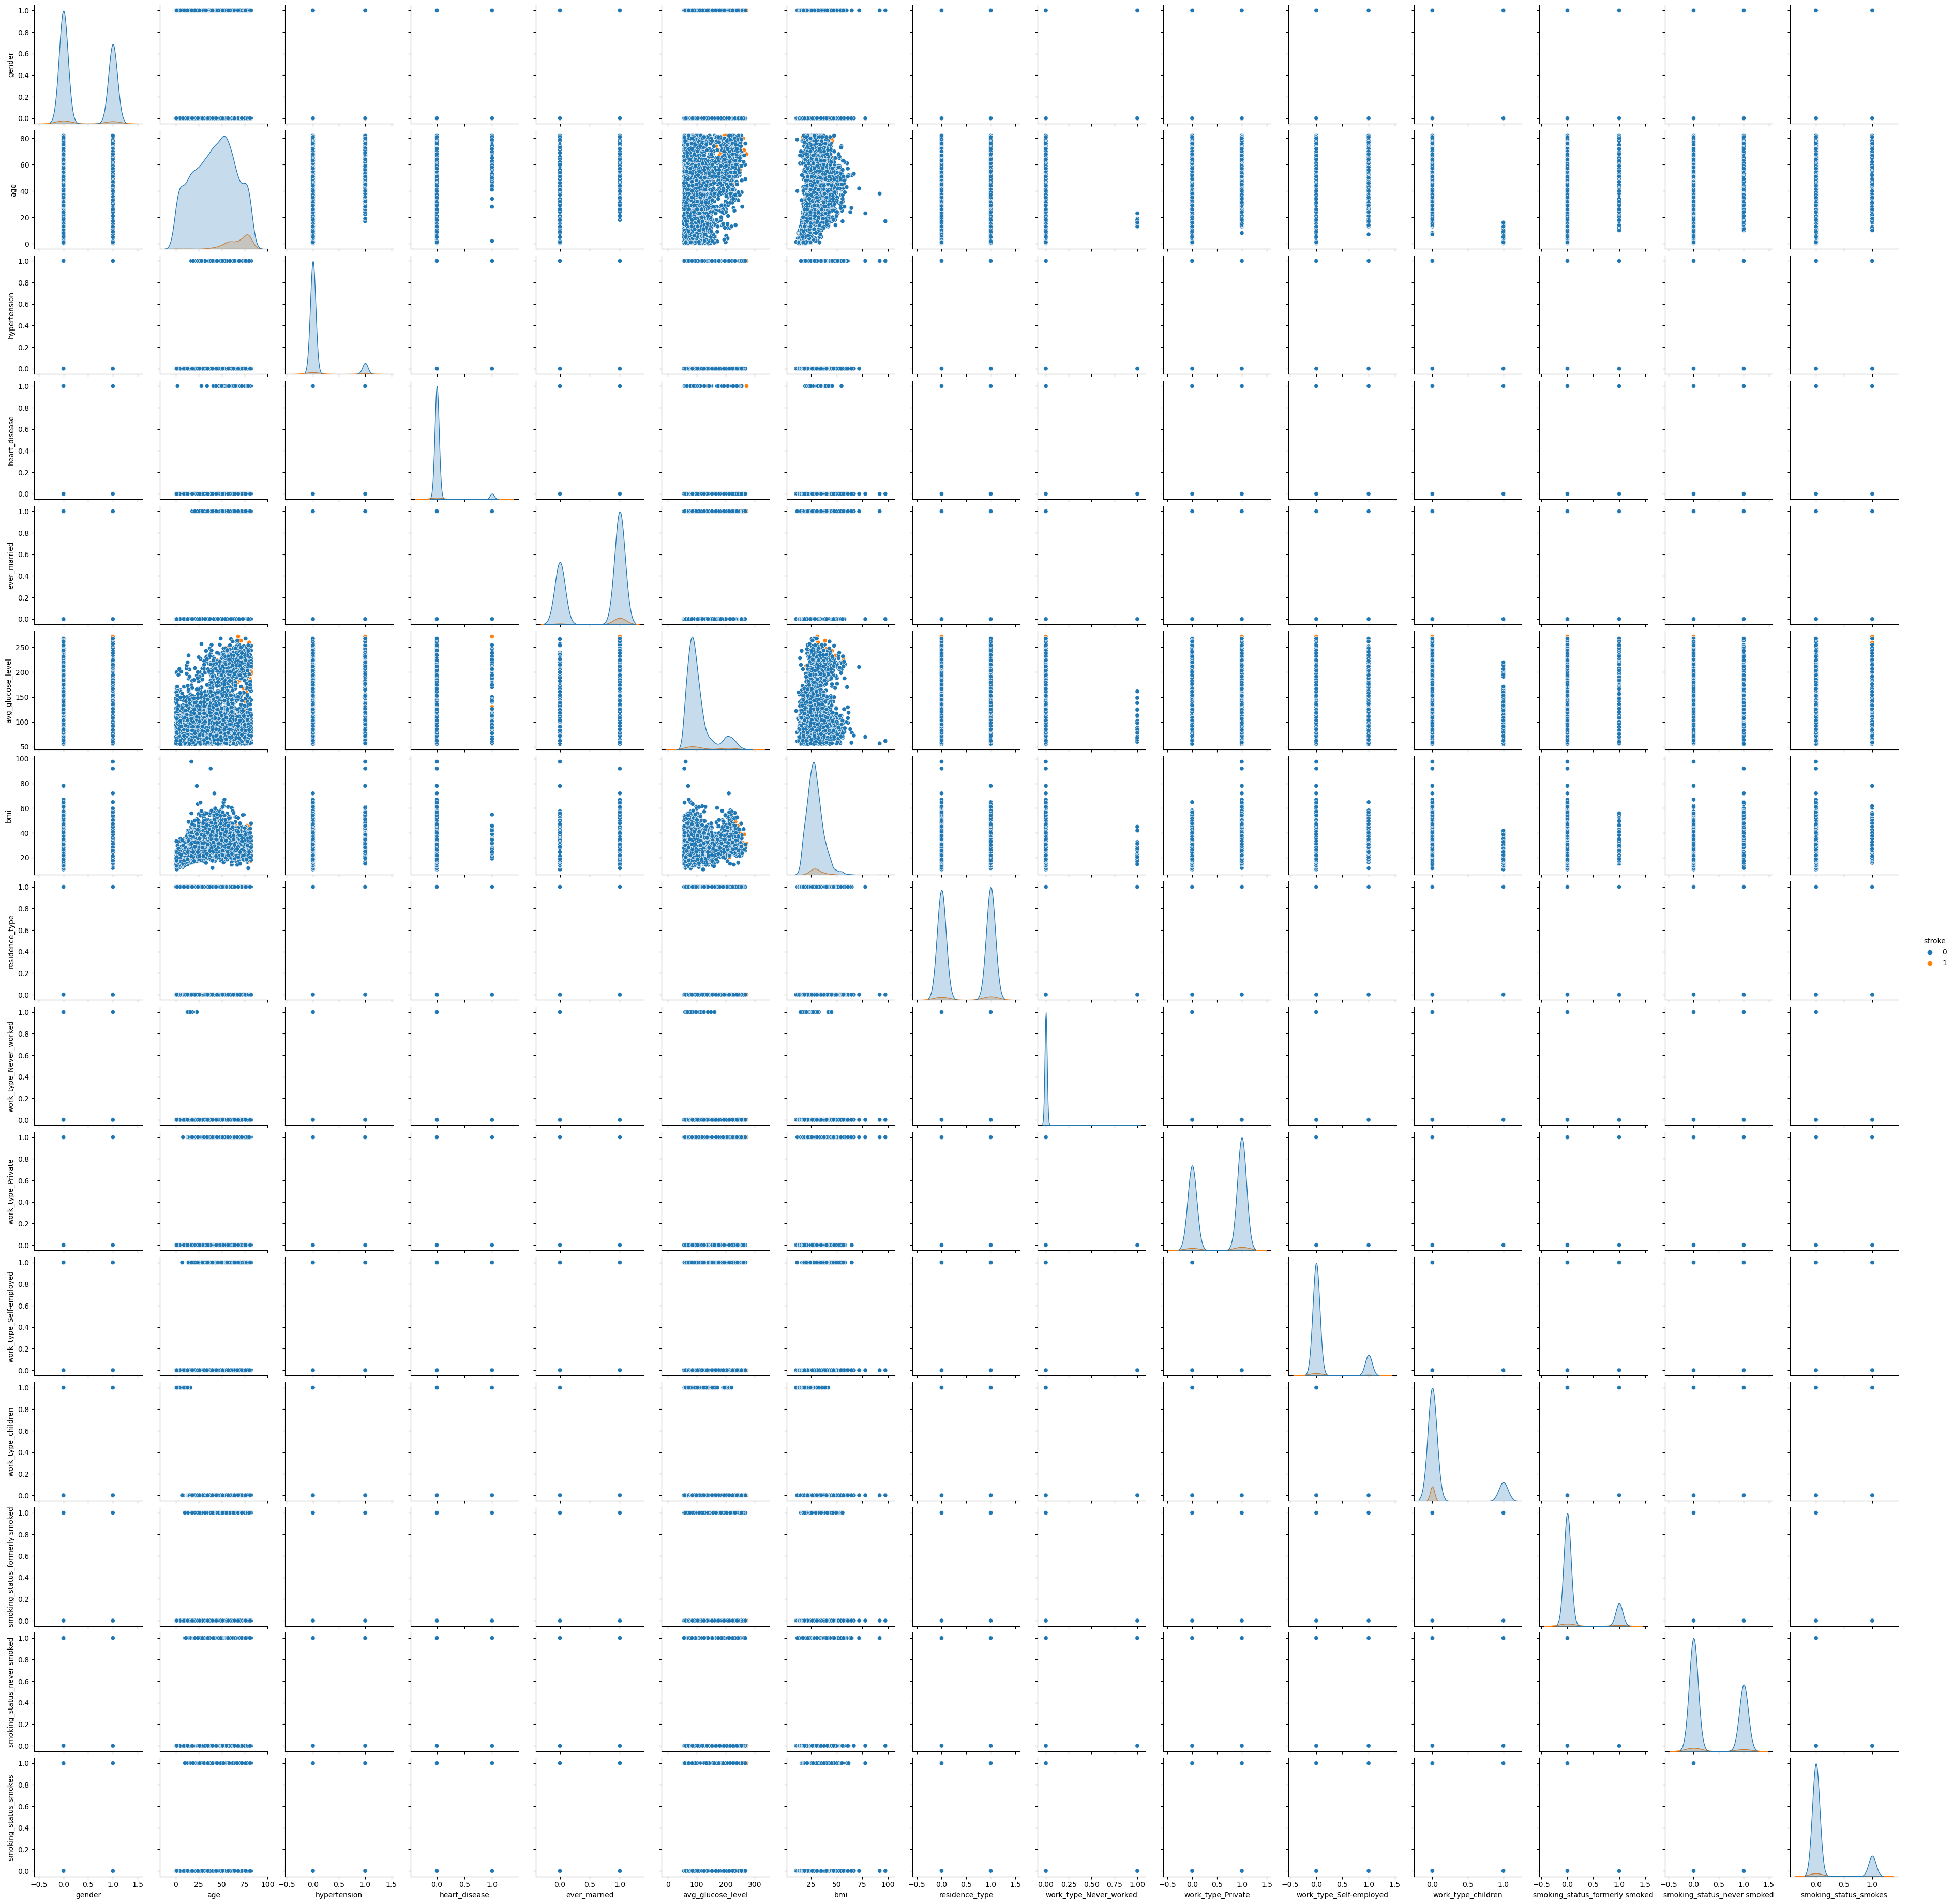

In [43]:
sns.pairplot(strokedf, hue = 'stroke')

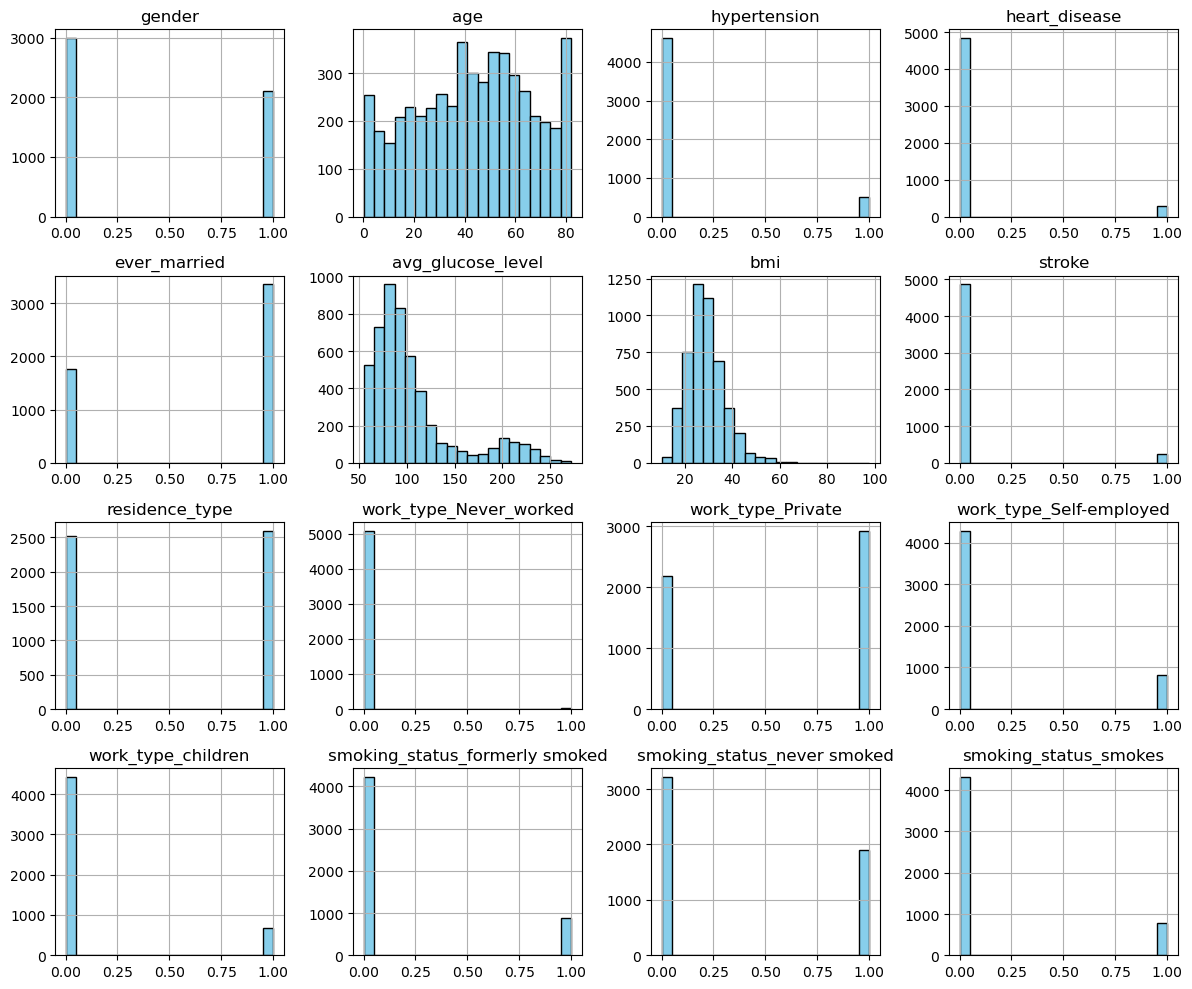

In [44]:
strokedf.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()   
plt.show()


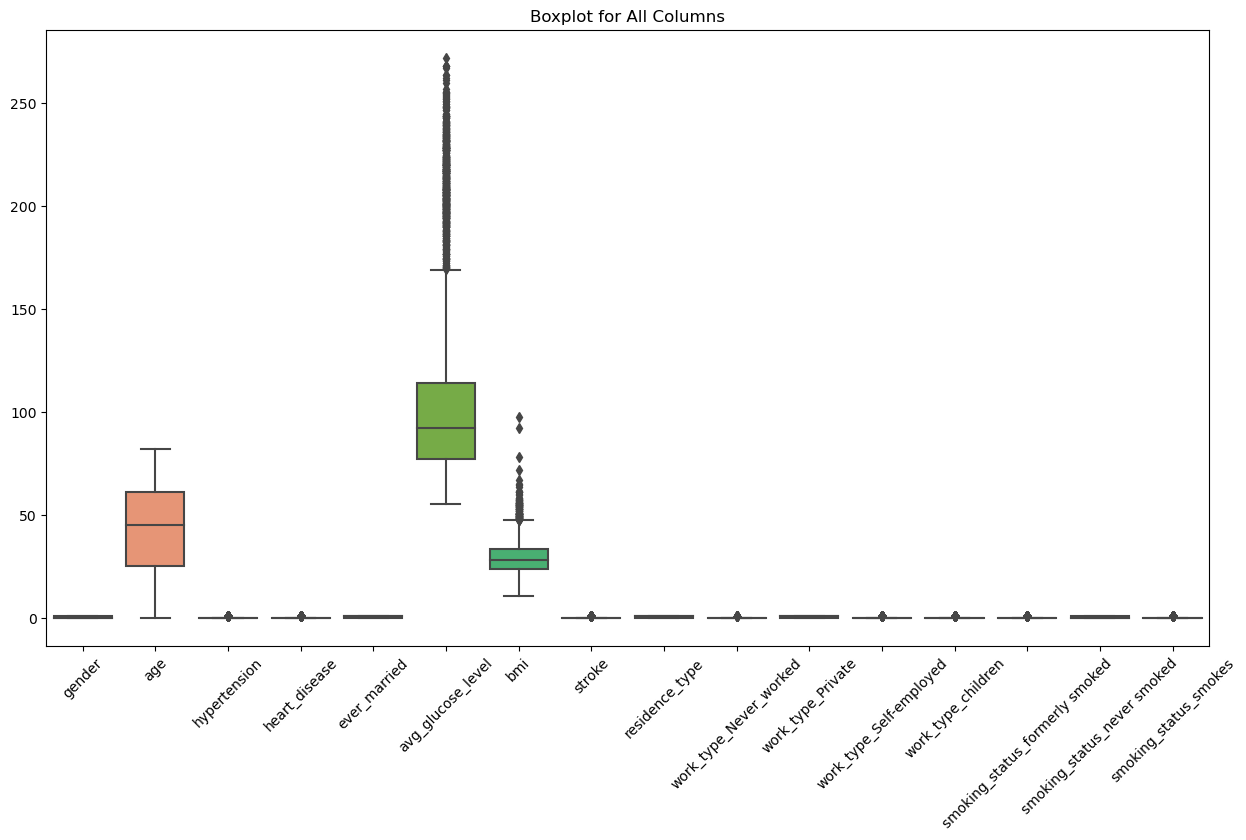

In [45]:
#Boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=strokedf)
plt.xticks(rotation=45)  
plt.title("Boxplot for All Columns")
plt.show()

avg_glucose_level and bmi columns show significant outliers
we need to perform outliers on them

# Exploring need for oversampling as "Imbalanced data"

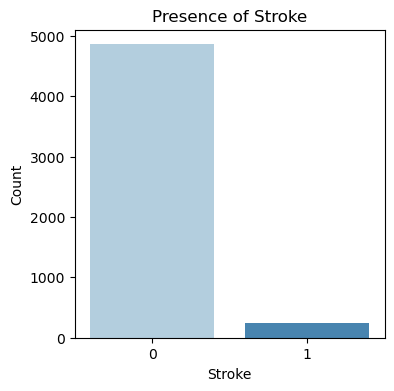

In [46]:
plt.figure(figsize=(4, 4))
sns.countplot(x='stroke', data=strokedf, palette="Blues")
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()

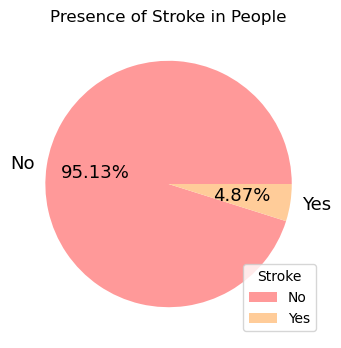

In [47]:
#or
plt.figure(figsize=(4, 4))
stroke_counts = strokedf['stroke'].value_counts()
labels = ['No', 'Yes']  # 0 = No Stroke, 1 = Stroke
colors = ['#ff9999', '#ffcc99']
textprops = {"fontsize": 13}

plt.pie(stroke_counts, labels=labels, autopct='%1.2f%%', colors=colors, textprops=textprops)
plt.title('Presence of Stroke in People')
plt.legend(title="Stroke")
plt.show()

The number of positive cases is 249
The number of negative cases is  4861 WE NEED TO! Oversampling using SMOTE AS EXAMPLE

### Preprocessing


In [48]:
# Step 1: Identify missing values
strokedf.isnull().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
avg_glucose_level                   0
bmi                               201
stroke                              0
residence_type                      0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

We noticed that the 'bmi' column had missing values, and since it's a numerical column, we used the median to fill the missing entries. Using the median is often preferred for numerical data since it’s less affected by outliers, compared to the mean. After applying this, all missing values were handled, and we verified there were no more missing values.

### 1- Handling The Missing values 

In [49]:
# from sklearn.impute import SimpleImputer

# # Define an imputer to fill missing values in the 'BMI' column with the mean
# imputer = SimpleImputer(strategy='median')

# # Apply the imputer only to the 'BMI' column
# strokedf['bmi'] = imputer.fit_transform(strokedf[['bmi']])


In [50]:
strokedf.isnull().sum()

gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
avg_glucose_level                   0
bmi                               201
stroke                              0
residence_type                      0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

### 2- Check duplicates

In [51]:
# Finding the duplicates
strokedf.duplicated().sum()

0

We checked for duplicates in our data, which could skew our analysis. Luckily, there were no duplicate rows in the dataset, ensuring that our data is unique.

###  3-Feature Standardization

In [52]:
# # Step 4: Feature Standardization
# # Identify numerical columns
# from sklearn.preprocessing import StandardScaler
# numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# # Standardize the numerical columns using StandardScaler
# scaler = StandardScaler()
# strokedf[numerical_columns] = scaler.fit_transform(strokedf[numerical_columns])

# print("\nStandardized Data (First 5 rows):")
# print(strokedf.head())


We standardized the numerical columns—'age', 'avg_glucose_level', and 'bmi'—using StandardScaler. This step is crucial because it brings all numerical features to the same scale, which is especially important for models like SVM, KNN, or Logistic Regression, which are sensitive to feature scales. After standardization, we could see that all the features have a mean of 0 and a standard deviation of 1.This makes all features comparable in terms of scale, and outliers are easier to detect after the values are brought to a common scale.

### 4- Handling the outliers 

Before Standardization: Extreme outliers can heavily influence the mean and standard deviation during the standardization process. If outliers are not handled first, they could distort the overall transformation, making the data less normalized and potentially affecting model performance.
After Standardization: Since the data is now on the same scale, outliers are easier to identify and treat without worrying about distorting the data's distribution during the transformation.

Outliers in 'avg_glucose_level': We noticed some extreme values in the 'avg_glucose_level', with values going up to 271.74, which is far above the 75th percentile value of 114.09. These could either represent valid high glucose levels in patients with diabetes or might be data entry errors. We applied an IQR (Interquartile Range) method to identify and cap the extreme values within a reasonable range. After that, we applied transformations like log transformations for more skewed data, though we left this option commented out for future experimentation.

Outliers in 'bmi': We saw extreme values in the 'bmi' column, with a maximum value of 97.6, which could indicate extreme cases of obesity or data entry errors. Similar to the glucose levels, we identified and capped the outliers using IQR, ensuring that the values fell within a more standard range.

#####

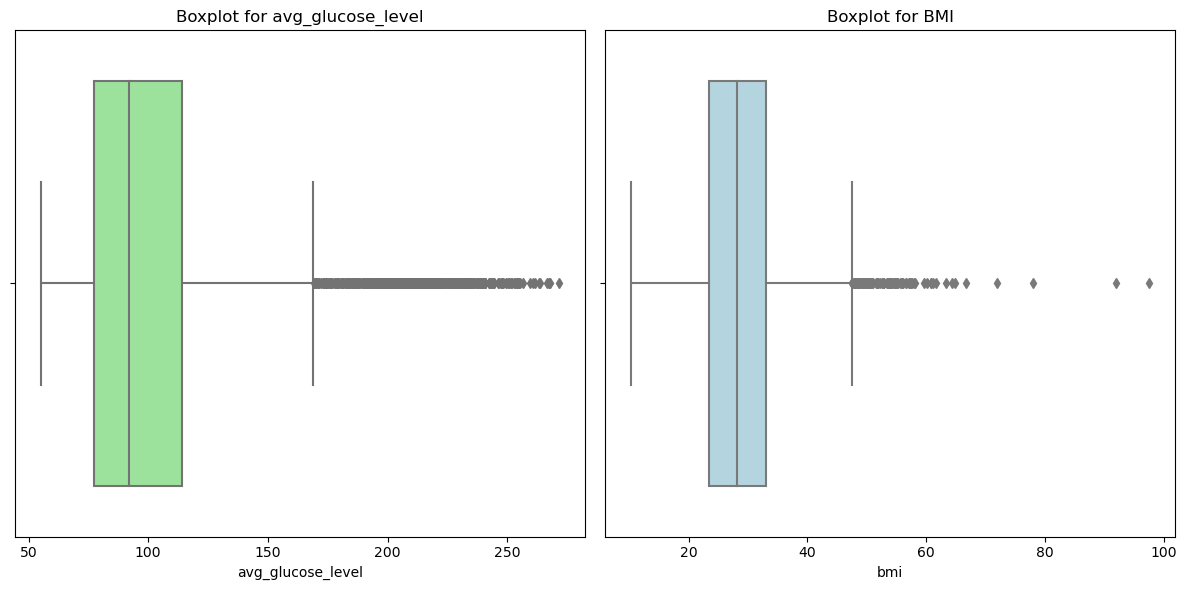

In [53]:
# Create a boxplot to visualize outliers for 'avg_glucose_level' and 'bmi'
plt.figure(figsize=(12, 6))

# Plot for 'avg_glucose_level'
plt.subplot(1, 2, 1)
sns.boxplot(x=strokedf['avg_glucose_level'], color='lightgreen')
plt.title('Boxplot for avg_glucose_level')

# Plot for 'bmi'
plt.subplot(1, 2, 2)
sns.boxplot(x=strokedf['bmi'], color='lightblue')
plt.title('Boxplot for BMI')

plt.tight_layout()
plt.show()

In [54]:
# دالة لاكتشاف ومعالجة القيم المتطرفة باستخدام IQR
def handle_outliers_iqr(df, column):
    # حساب الربع الأول (Q1) والربع الثالث (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # حساب المدى الربيعي
    
    # حساب الحدود السفلية والعلوية
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # ضبط القيم المتطرفة ضمن الحدود
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    # طباعة القيم المحددة لمعرفة التأثير
    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# تطبيق الدالة على الأعمدة التي تحتوي على القيم المتطرفة
handle_outliers_iqr(strokedf, 'avg_glucose_level')
handle_outliers_iqr(strokedf, 'bmi')

# التأكد من النتائج بعد المعالجة
print(strokedf[['avg_glucose_level', 'bmi']].describe())


avg_glucose_level: Lower Bound = 21.964999999999982, Upper Bound = 169.365
bmi: Lower Bound = 9.099999999999998, Upper Bound = 47.5
       avg_glucose_level          bmi
count        5109.000000  4908.000000
mean          100.988838    28.744804
std            33.214602     7.336352
min            55.120000    10.300000
25%            77.240000    23.500000
50%            91.880000    28.100000
75%           114.090000    33.100000
max           169.365000    47.500000


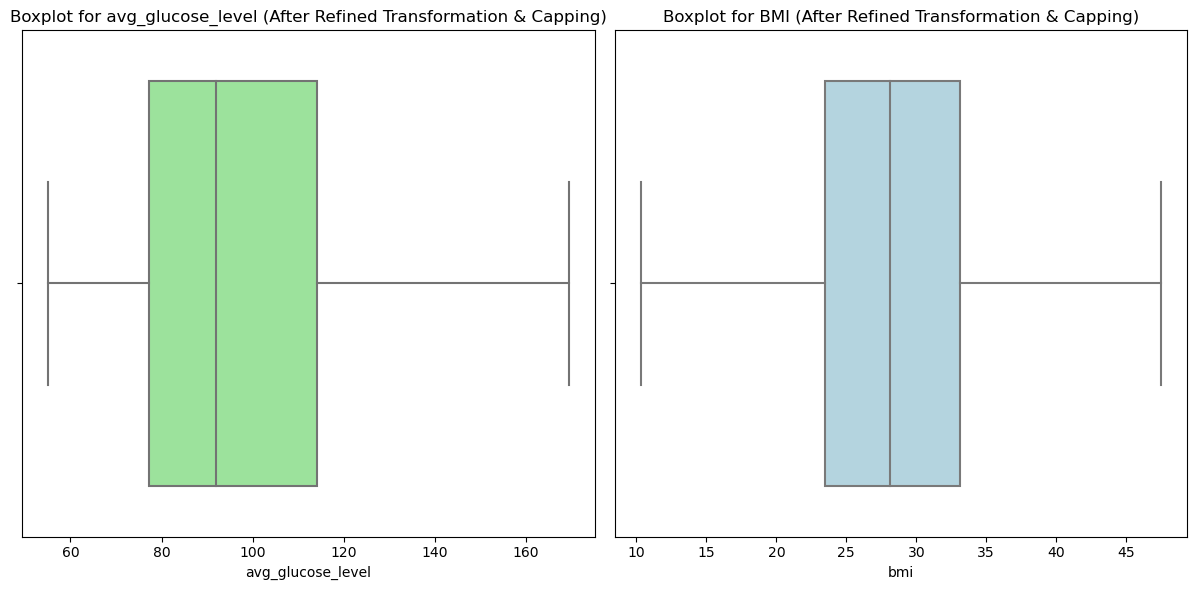

In [55]:
# Create a boxplot to visualize outliers for 'avg_glucose_level' and 'bmi'
plt.figure(figsize=(12, 6))

# Plot for 'avg_glucose_level'
plt.subplot(1, 2, 1)
sns.boxplot(x=strokedf['avg_glucose_level'], color='lightgreen')
plt.title('Boxplot for avg_glucose_level (After Refined Transformation & Capping)')

# Plot for 'bmi'
plt.subplot(1, 2, 2)
sns.boxplot(x=strokedf['bmi'], color='lightblue')
plt.title('Boxplot for BMI (After Refined Transformation & Capping)')

plt.tight_layout()
plt.show()

In [56]:
# data after standrization
strokedf

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,residence_type,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,169.365,36.6,1,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,169.365,NaN,1,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,105.920,32.5,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,169.365,34.4,1,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,169.365,24.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.750,NaN,0,1,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,125.200,40.0,0,1,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,82.990,30.6,0,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,166.290,25.6,0,0,0,1,0,0,1,0,0


# More feature engeneering

In [57]:
# Step 1: Map categorical features to risk values
# Assuming smoking_status is already one-hot encoded
# The 'smoking_status_formerly smoked' and 'smoking_status_smokes' columns should already be in binary form.

# Step 2: Define weights for each feature
weights = {
    'age': 0.3,
    'hypertension': 0.2,
    'heart_disease': 0.2,
    'avg_glucose_level': 0.2,
    'bmi': 0.1,
    'smoking_status_formerly smoked': 0.1,
    'smoking_status_smokes': 0.2,
    'ever_married': 0.1,  # Assuming that marriage status could affect health risk
    'residence_type': 0.1,  # Could indicate urban vs rural differences in healthcare
    'gender': 0.1
}

# Step 3: Calculate Health Risk Score using the processed data
strokedf['Health_Risk_Score'] = (
    weights['age'] * strokedf['age'] +
    weights['hypertension'] * strokedf['hypertension'] +
    weights['heart_disease'] * strokedf['heart_disease'] +
    weights['avg_glucose_level'] * strokedf['avg_glucose_level'] +
    weights['bmi'] * strokedf['bmi'] +
    weights['smoking_status_formerly smoked'] * strokedf['smoking_status_formerly smoked'] +
    weights['smoking_status_smokes'] * strokedf['smoking_status_smokes'] +
    weights['ever_married'] * strokedf['ever_married'] +
    weights['residence_type'] * strokedf['residence_type'] +
    weights['gender'] * strokedf['gender']
)

# Step 4: Inspect the new feature
print("\nHealth Risk Score (First 5 rows):")
print(strokedf[['Health_Risk_Score']].head())



Health Risk Score (First 5 rows):
   Health_Risk_Score
0             58.233
1                NaN
2             48.834
3             52.413
4             60.273


In [58]:
# Step 1: Create the Chronic Conditions Score feature
# The score will be 0 if no chronic condition, 1 if only one chronic condition, and 2 if both conditions present

strokedf['Chronic_Conditions_Score'] = strokedf['hypertension'] + strokedf['heart_disease']

# Step 2: Inspect the new feature
print("\nChronic Conditions Score (First 5 rows):")
print(strokedf[['Chronic_Conditions_Score']].head())



Chronic Conditions Score (First 5 rows):
   Chronic_Conditions_Score
0                         1
1                         0
2                         1
3                         0
4                         1


In [59]:
 #Create Age Group feature
def age_group(age):
    if age < 30:
        return 0  # Young
    elif 30 <= age <= 50:
        return 1  # Middle-aged
    else:
        return 2  # Older

strokedf['Age_Group'] = strokedf['age'].apply(age_group)

# Step 2: Inspect the new feature
print("\nAge Group (First 5 rows):")
print(strokedf[['Age_Group']].head())



Age Group (First 5 rows):
   Age_Group
0          2
1          2
2          2
3          1
4          2


# Handling Class Imbalance by Oversampling

One of the major challenges we faced was the class imbalance in the target variable, 'stroke'. The distribution before handling the imbalance was heavily skewed towards class 0 (no stroke), with 4860 samples of class 0 and only 249 samples of class 1 (stroke). This imbalance could result in our model being biased towards predicting the majority class.

To handle this imbalance, we used SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class. After applying SMOTE, the class distribution became balanced, with 4860 samples for both classes (stroke and no stroke). This should help the model learn to identify stroke cases better and prevent it from being biased towards the majority class.

# Data Leakage
is the problem when the information outside the training data is used for model creation. It is one of the most ignored problem.

# Start spliting data to train and test

In [60]:
#without oversampling!!!!!!!!!!

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming strokedf is your DataFrame

# Step 1: Split into training and testing sets
X = strokedf.drop('stroke', axis=1)  # Features
y = strokedf['stroke']  # Target

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Step 2: Handle missing values for 'BMI' column using median imputation
imputer = SimpleImputer(strategy='median')
# Impute missing values for 'bmi' and 'Health_Risk_Score'
X_train[['bmi', 'Health_Risk_Score']] = imputer.fit_transform(X_train[['bmi', 'Health_Risk_Score']])
X_test[['bmi', 'Health_Risk_Score']] = imputer.transform(X_test[['bmi', 'Health_Risk_Score']])

# Step 3: Feature Standardization
# Identify numerical columns that need standardization
numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'Health_Risk_Score']

# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Now, you can use X_train and y_train to train your model
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Initialize SVC models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions on the training set
y_pred_linear_train = svm_linear.predict(X_train)
y_pred_rbf_train = svm_rbf.predict(X_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Define a function to print the metrics for each kernel and dataset
def print_metrics(name, dataset, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='binary')
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"\n{name} Metrics ({dataset}):")
    print(f"\tAccuracy: {accuracy:.3f}%")
    print(f"\tF1-Score: {f1:.5f}")
    print(f"\tPrecision: {precision:.5f}")
    print(f"\tRecall: {recall:.5f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Print metrics for the linear kernel
print_metrics("Linear Kernel", "Train", y_train, y_pred_linear_train)
print_metrics("Linear Kernel", "Test", y_test, y_pred_linear)

# Print metrics for the RBF kernel
print_metrics("RBF Kernel", "Train", y_train, y_pred_rbf_train)
print_metrics("RBF Kernel", "Test", y_test, y_pred_rbf)



Linear Kernel Metrics (Train):
	Accuracy: 95.358%
	F1-Score: 0.00000
	Precision: 0.00000
	Recall: 0.00000
Confusion Matrix:
[[3410    0]
 [ 166    0]]

Linear Kernel Metrics (Test):
	Accuracy: 94.586%
	F1-Score: 0.00000
	Precision: 0.00000
	Recall: 0.00000
Confusion Matrix:
[[1450    0]
 [  83    0]]

RBF Kernel Metrics (Train):
	Accuracy: 95.358%
	F1-Score: 0.00000
	Precision: 0.00000
	Recall: 0.00000
Confusion Matrix:
[[3410    0]
 [ 166    0]]

RBF Kernel Metrics (Test):
	Accuracy: 94.586%
	F1-Score: 0.00000
	Precision: 0.00000
	Recall: 0.00000
Confusion Matrix:
[[1450    0]
 [  83    0]]


# by oversampling handle

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming strokedf is your DataFrame

# Step 1: Split into training and testing sets
X = strokedf.drop('stroke', axis=1)  # Features
y = strokedf['stroke']  # Target

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Step 2: Handle missing values for 'BMI' column using median imputation
imputer = SimpleImputer(strategy='median')
# Impute missing values for 'bmi' and 'Health_Risk_Score'
X_train[['bmi', 'Health_Risk_Score']] = imputer.fit_transform(X_train[['bmi', 'Health_Risk_Score']])
X_test[['bmi', 'Health_Risk_Score']] = imputer.transform(X_test[['bmi', 'Health_Risk_Score']])

# Step 3: Feature Standardization
# Identify numerical columns that need standardization
numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'Health_Risk_Score']


# Standardize the numerical columns using StandardScaler
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Step 4: Oversampling the minority class in the training data
# Combine X_train and y_train into a single DataFrame for oversampling
oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

# Calculate how many more samples of the minority class (stroke == 1) are needed
num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]

# Generate the new samples by oversampling the minority class (stroke == 1)
new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

# Concatenate the new samples to the original dataset and shuffle
oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

# Split the oversampled data back into X and y
y_train_oversampled = oversampled_data['stroke']
X_train_oversampled = oversampled_data.drop('stroke', axis=1)

# Print the distribution of the target class after oversampling
print("Target class distribution after handling imbalance:")
print(y_train_oversampled.value_counts())

# Now, you can use X_train_oversampled and y_train_oversampled to train your model


Target class distribution after handling imbalance:
stroke
0    3410
1    3410
Name: count, dtype: int64


# try handle missing values by knn

In [62]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Assuming strokedf is your DataFrame

# # Step 1: Split into training and testing sets
# X = strokedf.drop('stroke', axis=1)  # Features
# y = strokedf['stroke']  # Target

# # Split the data into training and testing sets (70% training, 30% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# # Step 2: Handle missing values for 'BMI' column using KNN imputation
# knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors based on your data

# # Impute missing values for 'bmi' and 'Health_Risk_Score' using KNN imputer
# X_train[['bmi', 'Health_Risk_Score']] = knn_imputer.fit_transform(X_train[['bmi', 'Health_Risk_Score']])
# X_test[['bmi', 'Health_Risk_Score']] = knn_imputer.transform(X_test[['bmi', 'Health_Risk_Score']])

# # Step 3: Feature Standardization
# # Identify numerical columns that need standardization
# numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'Health_Risk_Score']

# # Standardize the numerical columns using StandardScaler
# scaler = StandardScaler()
# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# # Step 4: Oversampling the minority class in the training data
# # Combine X_train and y_train into a single DataFrame for oversampling
# oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

# # Calculate how many more samples of the minority class (stroke == 1) are needed
# num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]

# # Generate the new samples by oversampling the minority class (stroke == 1)
# new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

# # Concatenate the new samples to the original dataset and shuffle
# oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

# # Split the oversampled data back into X and y
# y_train_oversampled = oversampled_data['stroke']
# X_train_oversampled = oversampled_data.drop('stroke', axis=1)

# # Print the distribution of the target class after oversampling
# print("Target class distribution after handling imbalance:")
# print(y_train_oversampled.value_counts())

# # Now, you can use X_train_oversampled and y_train_oversampled to train your model


In [63]:
X_train_oversampled.isna().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
residence_type                    0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
Health_Risk_Score                 0
Chronic_Conditions_Score          0
Age_Group                         0
dtype: int64

In [64]:
# from sklearn.model_selection import train_test_split

# #algorithm


# # Assuming strokedf is your DataFrame
# X = strokedf.drop('stroke', axis=1)  # Features
# y = strokedf['stroke']  # Target

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# # Create the oversampled_data DataFrame
# oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

# # Calculate how many more samples of the minority class (stroke == 1) are needed
# num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]

# # Generate the new samples by oversampling the minority class (stroke == 1)
# new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

# # Concatenate the new samples to the original dataset and shuffle
# oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

# # Split the oversampled data back into X and y
# y_train_oversampled = oversampled_data['stroke']
# X_train_oversampled = oversampled_data.drop('stroke', axis=1)

# # Print the distribution of the target class after oversampling
# print("Target class distribution after handling imbalance:")
# print(y_train_oversampled.value_counts())



In [65]:
# # Step 5: Handle Imbalanced Data
# # Assuming 'stroke' is the target column
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# print("\nClass distribution before handling imbalance:")
# print(Counter(strokedf['stroke']))

# # Separate features (X) and target (y)
# X = strokedf.drop(columns=['stroke'])
# y = strokedf['stroke']

# # Handle imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("\nClass distribution after handling imbalance:")
# print(Counter(y_resampled))


In [66]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Initialize SVC models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Train the models
svm_linear.fit(X_train_oversampled, y_train_oversampled)
svm_rbf.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the training set
y_pred_linear_train = svm_linear.predict(X_train_oversampled)
y_pred_rbf_train = svm_rbf.predict(X_train_oversampled)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Define a function to print the metrics for each kernel and dataset
def print_metrics(name, dataset, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='binary')
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"\n{name} Metrics ({dataset}):")
    print(f"\tAccuracy: {accuracy:.3f}%")
    print(f"\tF1-Score: {f1:.5f}")
    print(f"\tPrecision: {precision:.5f}")
    print(f"\tRecall: {recall:.5f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Print metrics for the linear kernel
print_metrics("Linear Kernel", "Train", y_train_oversampled, y_pred_linear_train)
print_metrics("Linear Kernel", "Test", y_test, y_pred_linear)

# Print metrics for the RBF kernel
print_metrics("RBF Kernel", "Train", y_train_oversampled, y_pred_rbf_train)
print_metrics("RBF Kernel", "Test", y_test, y_pred_rbf)



Linear Kernel Metrics (Train):
	Accuracy: 74.340%
	F1-Score: 0.77425
	Precision: 0.69116
	Recall: 0.88006
Confusion Matrix:
[[2069 1341]
 [ 409 3001]]

Linear Kernel Metrics (Test):
	Accuracy: 63.144%
	F1-Score: 0.21637
	Precision: 0.12226
	Recall: 0.93976
Confusion Matrix:
[[890 560]
 [  5  78]]

RBF Kernel Metrics (Train):
	Accuracy: 85.235%
	F1-Score: 0.86058
	Precision: 0.81511
	Recall: 0.91144
Confusion Matrix:
[[2705  705]
 [ 302 3108]]

RBF Kernel Metrics (Test):
	Accuracy: 78.604%
	F1-Score: 0.23005
	Precision: 0.14286
	Recall: 0.59036
Confusion Matrix:
[[1156  294]
 [  34   49]]


In [67]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assume you have a dataset named strokedf
# Split the data into features (X) and target (y)
y_train_oversampled = oversampled_data['stroke']  # Target variable
X_train_oversampled = oversampled_data.drop('stroke', axis=1)  # Features, removing the target variable

# Train the Decision Tree model
model = DecisionTreeClassifier()  # Initialize the model
model.fit(X_train_oversampled, y_train_oversampled)  # Fit the model with training data

# Get the importance of each feature
feature_importance = model.feature_importances_

# Sort features based on their importance
importance_df = pd.DataFrame({"Feature": X_train_oversampled.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display the most important features
print(importance_df)


                           Feature  Importance
1                              age    0.443688
6                              bmi    0.168826
15               Health_Risk_Score    0.132960
5                avg_glucose_level    0.117809
7                   residence_type    0.025788
3                    heart_disease    0.020557
13     smoking_status_never smoked    0.017262
14           smoking_status_smokes    0.017228
10         work_type_Self-employed    0.016737
16        Chronic_Conditions_Score    0.009684
2                     hypertension    0.006899
0                           gender    0.006703
17                       Age_Group    0.005237
4                     ever_married    0.004550
9                work_type_Private    0.004487
12  smoking_status_formerly smoked    0.001584
11              work_type_children    0.000000
8           work_type_Never_worked    0.000000


In [68]:

# Feature importance results (from previous calculation)
importance_df = pd.DataFrame({
    "Feature": ['age', 'bmi', 'Health_Risk_Score', 'avg_glucose_level', 'residence_type', 
                'smoking_status_smokes', 'work_type_Self-employed', 'smoking_status_never smoked', 
                'heart_disease', 'Chronic_Conditions_Score', 'gender', 'hypertension', 
                'smoking_status_formerly smoked', 'work_type_Private', 'ever_married', 
                'work_type_children', 'work_type_Never_worked', 'Age_Group'],
    "Importance": [0.452135, 0.163223, 0.130802, 0.124196, 0.024486, 0.017439, 0.016691, 
                   0.015741, 0.015073, 0.010478, 0.008347, 0.007483, 0.005413, 0.004497, 
                   0.003996, 0.000000, 0.000000, 0.000000]
})

# Select features with importance greater than 0.01
important_features = importance_df[importance_df['Importance'] > 0.01]['Feature'].tolist()



# Initialize SVC models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')

# Select only the important features from the dataset
X_train_important = X_train_oversampled[important_features]  # Use the important features for training
X_test_important = X_test[important_features]  # Use the important features for testing

# Train the models using only the important features
svm_linear.fit(X_train_important, y_train_oversampled)
svm_rbf.fit(X_train_important, y_train_oversampled)

# Make predictions on the training set
y_pred_linear_train = svm_linear.predict(X_train_important)
y_pred_rbf_train = svm_rbf.predict(X_train_important)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test_important)
y_pred_rbf = svm_rbf.predict(X_test_important)

# Define a function to print the metrics for each kernel and dataset
def print_metrics(name, dataset, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='binary')
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"\n{name} Metrics ({dataset}):")
    print(f"\tAccuracy: {accuracy:.3f}%")
    print(f"\tF1-Score: {f1:.5f}")
    print(f"\tPrecision: {precision:.5f}")
    print(f"\tRecall: {recall:.5f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Print metrics for the Linear Kernel
print_metrics("Linear Kernel", "Train", y_train_oversampled, y_pred_linear_train)
print_metrics("Linear Kernel", "Test", y_test, y_pred_linear)

# Print metrics for the RBF Kernel
print_metrics("RBF Kernel", "Train", y_train_oversampled, y_pred_rbf_train)
print_metrics("RBF Kernel", "Test", y_test, y_pred_rbf)



Linear Kernel Metrics (Train):
	Accuracy: 75.235%
	F1-Score: 0.76215
	Precision: 0.73313
	Recall: 0.79355
Confusion Matrix:
[[2425  985]
 [ 704 2706]]

Linear Kernel Metrics (Test):
	Accuracy: 72.016%
	F1-Score: 0.25131
	Precision: 0.14694
	Recall: 0.86747
Confusion Matrix:
[[1032  418]
 [  11   72]]

RBF Kernel Metrics (Train):
	Accuracy: 84.282%
	F1-Score: 0.85556
	Precision: 0.79138
	Recall: 0.93109
Confusion Matrix:
[[2573  837]
 [ 235 3175]]

RBF Kernel Metrics (Test):
	Accuracy: 74.234%
	F1-Score: 0.23002
	Precision: 0.13721
	Recall: 0.71084
Confusion Matrix:
[[1079  371]
 [  24   59]]


# Cross validation

Cross Validation will enable us to see whether we are facing an overfitting problem and also to see the quality of our model. MAYBE SOLVE IT it will enable us to test the performance of our model before encountering high error rates in the test data set that we have not seen yet. It is a method that is frequently used because it is easy to apply.

# this one with smote done

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the training and test data (Assume that X_train_oversampled, y_train_oversampled, X_test, and y_test are available)
# These should be replaced with your actual data

# Define the models
svm_linear = SVC(kernel='linear')  # Linear kernel SVM model
svm_rbf = SVC(kernel='rbf')  # RBF kernel SVM model

# Evaluate the model using cross-validation on the training data
k = 10  # Number of folds for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=1)  # KFold with 10 splits

# Evaluate both models using cross-validation on the training data
linear_cv_scores = cross_val_score(svm_linear, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')
rbf_cv_scores = cross_val_score(svm_rbf, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')

# Function to print the cross-validation results
def print_cv_results(model_name, cv_scores):
    print(f"\n{model_name} Cross-Validation Results:")
    print(f"\tMean Accuracy: {np.mean(cv_scores) * 100:.3f}%")  # Mean accuracy
    print(f"\tStandard Deviation: {np.std(cv_scores) * 100:.3f}%")  # Standard deviation of accuracy
    print(f"\tAll Fold Accuracies: {cv_scores}")  # Accuracy for each fold

# Print the cross-validation results for both models
print_cv_results("Linear Kernel SVC", linear_cv_scores)
print_cv_results("RBF Kernel SVC", rbf_cv_scores)

# Train the models using the training data
svm_linear.fit(X_train_oversampled, y_train_oversampled)  # Train linear kernel model
svm_rbf.fit(X_train_oversampled, y_train_oversampled)  # Train RBF kernel model

# Make predictions using the test data
linear_predictions = svm_linear.predict(X_test)  # Predictions from linear kernel model
rbf_predictions = svm_rbf.predict(X_test)  # Predictions from RBF kernel model

# Calculate accuracy on the test data
linear_accuracy = accuracy_score(y_test, linear_predictions)  # Accuracy for linear kernel model
rbf_accuracy = accuracy_score(y_test, rbf_predictions)  # Accuracy for RBF kernel model

# Calculate F1 Score and Recall for each model
linear_f1 = f1_score(y_test, linear_predictions, average='weighted')  # F1 score for linear kernel model
rbf_f1 = f1_score(y_test, rbf_predictions, average='weighted')  # F1 score for RBF kernel model

linear_recall = recall_score(y_test, linear_predictions, average='weighted')  # Recall for linear kernel model
rbf_recall = recall_score(y_test, rbf_predictions, average='weighted')  # Recall for RBF kernel model

# Print the results
print(f"\nLinear Kernel SVC Test Accuracy: {linear_accuracy * 100:.3f}%")  # Accuracy for linear kernel model on test data
print(f"RBF Kernel SVC Test Accuracy: {rbf_accuracy * 100:.3f}%")  # Accuracy for RBF kernel model on test data

print(f"\nLinear Kernel SVC TEST F1 Score: {linear_f1 * 100:.3f}%")  # F1 score for linear kernel model on test data
print(f"RBF Kernel SVC TEST F1 Score: {rbf_f1 * 100:.3f}%")  # F1 score for RBF kernel model on test data

print(f"\nLinear Kernel SVC Recall: {linear_recall * 100:.3f}%")  # Recall for linear kernel model on test data
print(f"RBF Kernel SVC Recall: {rbf_recall * 100:.3f}%")  # Recall for RBF kernel model on test data



Linear Kernel SVC Cross-Validation Results:
	Mean Accuracy: 74.340%
	Standard Deviation: 1.422%
	All Fold Accuracies: [0.728739   0.73167155 0.75806452 0.72434018 0.72580645 0.73900293
 0.75513196 0.75073314 0.76099707 0.75953079]

RBF Kernel SVC Cross-Validation Results:
	Mean Accuracy: 84.047%
	Standard Deviation: 1.691%
	All Fold Accuracies: [0.82844575 0.81524927 0.8372434  0.8255132  0.8372434  0.8372434
 0.86363636 0.83431085 0.85190616 0.87390029]

Linear Kernel SVC Test Accuracy: 63.144%
RBF Kernel SVC Test Accuracy: 78.604%

Linear Kernel SVC TEST F1 Score: 72.968%
RBF Kernel SVC TEST F1 Score: 84.080%

Linear Kernel SVC Recall: 63.144%
RBF Kernel SVC Recall: 78.604%


# BY  Stratified K-Fold Cross-Validation  AS IT MAKE EACH FOLD HAS THE SAME DISTRBUTION ON OF TARGET CLASSES

# SMOTE+ Stratified K-Fold Cross-Validation

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Define the models with class weights set to 'balanced' to handle class imbalance
svm_linear = SVC(kernel='linear', class_weight='balanced')  # Linear kernel SVM model
svm_rbf = SVC(kernel='rbf', class_weight='balanced')  # RBF kernel SVM model

# Define StratifiedKFold cross-validation to ensure balanced class distribution across folds
k = 10  # Number of splits for cross-validation
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)  # StratifiedKFold with 10 splits

# Apply SMOTE to the training data to generate synthetic samples and address class imbalance
smote = SMOTE(random_state=1)  # Initialize SMOTE
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to oversample the minority class

# Evaluate the models using cross-validation on the oversampled training data
linear_cv_scores = cross_val_score(svm_linear, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')  # Linear kernel
rbf_cv_scores = cross_val_score(svm_rbf, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')  # RBF kernel

# Function to print the cross-validation results
def print_cv_results(model_name, cv_scores):
    print(f"\n{model_name} Cross-Validation Results:")
    print(f"\tMean Accuracy: {np.mean(cv_scores) * 100:.3f}%")  # Mean accuracy of the folds
    print(f"\tStandard Deviation: {np.std(cv_scores) * 100:.3f}%")  # Standard deviation of accuracy across folds
    print(f"\tAll Fold Accuracies: {cv_scores}")  # Accuracy for each individual fold

# Print the cross-validation results for both models
print_cv_results("Linear Kernel SVC", linear_cv_scores)
print_cv_results("RBF Kernel SVC", rbf_cv_scores)

# Train both models using the oversampled training data
svm_linear.fit(X_train_oversampled, y_train_oversampled)  # Train linear kernel model
svm_rbf.fit(X_train_oversampled, y_train_oversampled)  # Train RBF kernel model

# Make predictions on the test data
linear_predictions = svm_linear.predict(X_test)  # Predictions from linear kernel model
rbf_predictions = svm_rbf.predict(X_test)  # Predictions from RBF kernel model

# Calculate the accuracy on the test data
linear_accuracy = accuracy_score(y_test, linear_predictions)  # Accuracy for linear kernel model
rbf_accuracy = accuracy_score(y_test, rbf_predictions)  # Accuracy for RBF kernel model

# Calculate the F1 Score and Recall for each model
linear_f1 = f1_score(y_test, linear_predictions, average='weighted')  # F1 score for linear kernel model
rbf_f1 = f1_score(y_test, rbf_predictions, average='weighted')  # F1 score for RBF kernel model

linear_recall = recall_score(y_test, linear_predictions, average='weighted')  # Recall for linear kernel model
rbf_recall = recall_score(y_test, rbf_predictions, average='weighted')  # Recall for RBF kernel model

# Print the test results
print(f"\nLinear Kernel SVC Test Accuracy: {linear_accuracy * 100:.3f}%")  # Accuracy for linear kernel model on test data
print(f"RBF Kernel SVC Test Accuracy: {rbf_accuracy * 100:.3f}%")  # Accuracy for RBF kernel model on test data

print(f"\nLinear Kernel SVC F1 Score: {linear_f1 * 100:.3f}%")  # F1 score for linear kernel model on test data
print(f"RBF Kernel SVC F1 Score: {rbf_f1 * 100:.3f}%")  # F1 score for RBF kernel model on test data

print(f"\nLinear Kernel SVC Recall: {linear_recall * 100:.3f}%")  # Recall for linear kernel model on test data
print(f"RBF Kernel SVC Recall: {rbf_recall * 100:.3f}%")  # Recall for RBF kernel model on test data



Linear Kernel SVC Cross-Validation Results:
	Mean Accuracy: 79.179%
	Standard Deviation: 2.203%
	All Fold Accuracies: [0.7888563  0.81085044 0.79178886 0.76539589 0.77419355 0.78445748
 0.75659824 0.79765396 0.81818182 0.82991202]

RBF Kernel SVC Cross-Validation Results:
	Mean Accuracy: 87.302%
	Standard Deviation: 1.246%
	All Fold Accuracies: [0.8856305  0.8914956  0.86510264 0.85337243 0.86217009 0.88269795
 0.85923754 0.86656891 0.88123167 0.88269795]

Linear Kernel SVC Test Accuracy: 76.582%
RBF Kernel SVC Test Accuracy: 81.409%

Linear Kernel SVC F1 Score: 82.810%
RBF Kernel SVC F1 Score: 85.792%

Linear Kernel SVC Recall: 76.582%
RBF Kernel SVC Recall: 81.409%


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Define models to evaluate
models = {
    "SVM (Linear Kernel)": SVC(kernel='linear', class_weight='balanced'),
    "SVM (RBF Kernel)": SVC(kernel='rbf', class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB()
}

# Define StratifiedKFold cross-validation
k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Function to print cross-validation results
def print_cv_results(model_name, cv_scores):
    print(f"\n{model_name} Cross-Validation Results:")
    print(f"\tMean Accuracy: {np.mean(cv_scores) * 100:.3f}%")
    print(f"\tStandard Deviation: {np.std(cv_scores) * 100:.3f}%")
    print(f"\tAll Fold Accuracies: {cv_scores}")

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Cross-validation on oversampled data
    cv_scores = cross_val_score(model, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')
    print_cv_results(model_name, cv_scores)
    
    # Train the model
    model.fit(X_train_oversampled, y_train_oversampled)
    
    # Test the model on test data
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    # Print test results
    print(f"\n{model_name} Test Accuracy: {accuracy * 100:.3f}%")
    print(f"{model_name} F1 Score: {f1 * 100:.3f}%")
    print(f"{model_name} Recall: {recall * 100:.3f}%")


In [71]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Define models to evaluate
models = {
    "SVM (Linear Kernel)": SVC(kernel='linear', class_weight='balanced'),
    "SVM (RBF Kernel)": SVC(kernel='rbf', class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB()
}

# Define StratifiedKFold cross-validation
k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=1)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Function to print cross-validation results
def print_cv_results(model_name, cv_scores):
    print(f"\n{model_name} Cross-Validation Results:")
    print(f"\tMean Accuracy: {np.mean(cv_scores) * 100:.3f}%")
    print(f"\tStandard Deviation: {np.std(cv_scores) * 100:.3f}%")
    print(f"\tAll Fold Accuracies: {cv_scores}")

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    
    # Cross-validation on oversampled data
    cv_scores = cross_val_score(model, X_train_oversampled, y_train_oversampled, cv=kf, scoring='accuracy')
    print_cv_results(model_name, cv_scores)
    
    # Train the model
    model.fit(X_train_oversampled, y_train_oversampled)
    
    # Test the model on test data
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    # Print test results
    print(f"\n{model_name} Test Accuracy: {accuracy * 100:.3f}%")
    print(f"{model_name} F1 Score: {f1 * 100:.3f}%")
    print(f"{model_name} Recall: {recall * 100:.3f}%")



Evaluating SVM (Linear Kernel)...

SVM (Linear Kernel) Cross-Validation Results:
	Mean Accuracy: 79.179%
	Standard Deviation: 2.203%
	All Fold Accuracies: [0.7888563  0.81085044 0.79178886 0.76539589 0.77419355 0.78445748
 0.75659824 0.79765396 0.81818182 0.82991202]

SVM (Linear Kernel) Test Accuracy: 76.582%
SVM (Linear Kernel) F1 Score: 82.810%
SVM (Linear Kernel) Recall: 76.582%

Evaluating SVM (RBF Kernel)...

SVM (RBF Kernel) Cross-Validation Results:
	Mean Accuracy: 87.302%
	Standard Deviation: 1.246%
	All Fold Accuracies: [0.8856305  0.8914956  0.86510264 0.85337243 0.86217009 0.88269795
 0.85923754 0.86656891 0.88123167 0.88269795]

SVM (RBF Kernel) Test Accuracy: 81.409%
SVM (RBF Kernel) F1 Score: 85.792%
SVM (RBF Kernel) Recall: 81.409%

Evaluating K-Nearest Neighbors...

K-Nearest Neighbors Cross-Validation Results:
	Mean Accuracy: 89.677%
	Standard Deviation: 1.134%
	All Fold Accuracies: [0.89296188 0.91788856 0.88123167 0.89442815 0.88709677 0.89002933
 0.88709677 0.8988

# 

# Comparative Analysis

Decision Tree: Best overall performance and generalization.

SVM (RBF Kernel): Strong performance, especially for nonlinear patterns.

K-Nearest Neighbors (KNN): Balanced and consistent, close to RBF Kernel SVM.

SVM (Linear Kernel): Decent but less competitive performance.

Naive Bayes: Poor performance, unsuitable for this dataset.

# Strengths and Weaknesses of Each Algorithm

# K-Nearest Neighbors (KNN)

Strengths:

    High cross-validation and test accuracy.

    Works well with datasets where class boundaries are not linear.

    Simple to implement and interpret.
Weaknesses:

    Sensitive to noisy or irrelevant features.

    Computationally expensive as the dataset size grows

# Naive Bayes

Strengths:

    Fast and efficient for large datasets.
    

    Performs well when features are independent.
Weaknesses:

    Strongly assumes feature independence, which may not hold in this dataset.

    Poor generalization, as evidenced by low test accuracy and recall.

# SVM

SVM (Linear Kernel)

Strengths:

    Works well for linearly separable data.

    Robust to overfitting in high-dimensional spaces.
Weaknesses:

    Suboptimal performance on nonlinear datasets (as seen here).

    Relatively lower cross-validation and test performance compared to RBF Kernel.

SVM (RBF Kernel)

Strengths:

    Handles nonlinear relationships effectively.

    Competitive cross-validation and test accuracy, with high consistency.
Weaknesses:

    Computationally expensive to tune parameters (C, gamma).


# Decision Tree


Strengths:

    High accuracy and generalization.

    Easy to interpret and visualize.

    Performs well even with nonlinear relationships and mixed feature types.
Weaknesses:

    Prone to overfitting without pruning or regularization.

    Performance may degrade with noisy data

# #Insights and Recommendation
Based on the evaluation metrics:

Decision Tree is the best-performing algorithm, achieving the highest test accuracy, F1 Score, and recall. It captures complex 
patterns in the dataset effectively, making it suitable for the prediction objective.

SVM (RBF Kernel) is a strong alternative, especially if model interpretability is not a primary concern and computational cost is manageable.

KNN also performs well and can be considered for smaller datasets where computational efficiency is less critical.
Naive Bayes is not suitable for this dataset due to its poor performance, likely caused by its strong independence assumptions.

# Recommendation:

The Decision Tree is the preferred algorithm for achieving the prediction objective, as it provides the best balance of accuracy, recall, and interpretability for this dataset.WE CAN *tuning HYPERPRAMETERS or further improving the Decision Tree model*